# chapter2 feature engineering code

## install dependencies

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## page rank

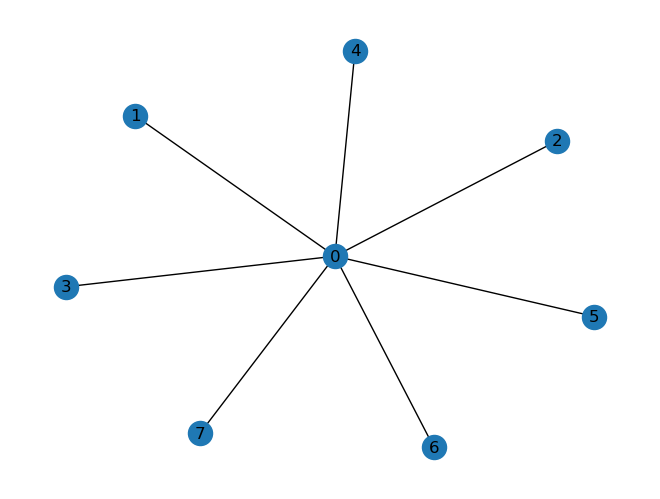

In [2]:
G = nx.star_graph(7)
nx.draw(G, with_labels=True)

In [3]:
pagerank = nx.pagerank(G, alpha=0.8)
pagerank

{0: 0.4583348922684132,
 1: 0.07738072967594098,
 2: 0.07738072967594098,
 3: 0.07738072967594098,
 4: 0.07738072967594098,
 5: 0.07738072967594098,
 6: 0.07738072967594098,
 7: 0.07738072967594098}

## degree

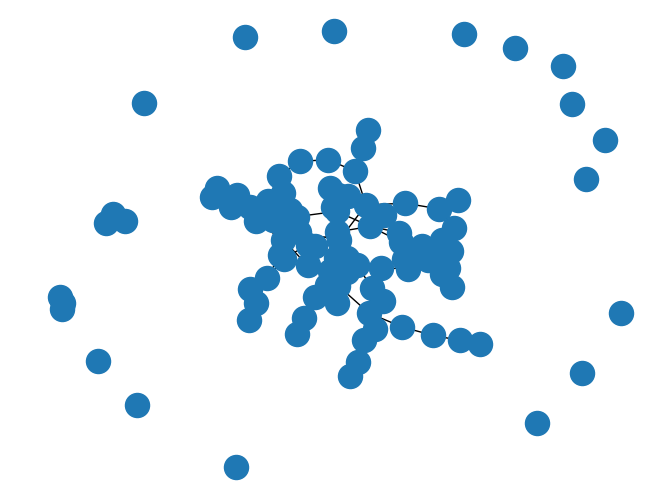

In [4]:
G = nx.gnp_random_graph(100, 0.02, seed=10374196)
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos)

### create subgraph

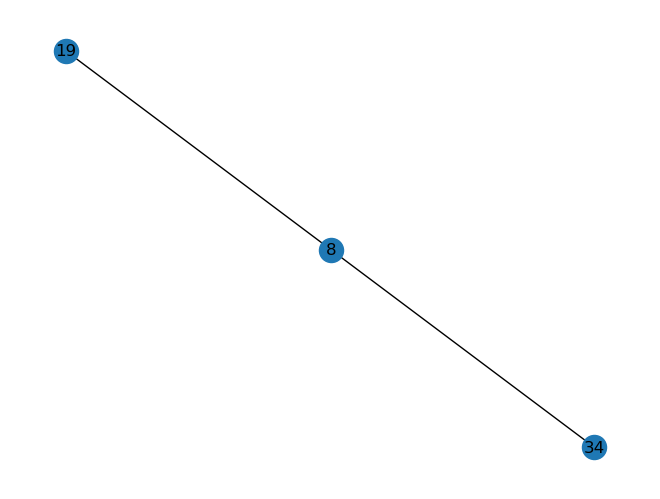

In [15]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[1])
nx.draw(Gcc, with_labels=True)

### degree feature

In [31]:
G.degree()

DegreeView({0: 2, 1: 4, 2: 4, 3: 4, 4: 2, 5: 4, 6: 4, 7: 2, 8: 2, 9: 1, 10: 3, 11: 0, 12: 1, 13: 2, 14: 6, 15: 2, 16: 0, 17: 0, 18: 3, 19: 1, 20: 3, 21: 1, 22: 1, 23: 1, 24: 1, 25: 3, 26: 0, 27: 2, 28: 2, 29: 0, 30: 2, 31: 1, 32: 1, 33: 0, 34: 1, 35: 4, 36: 2, 37: 2, 38: 1, 39: 5, 40: 5, 41: 1, 42: 4, 43: 1, 44: 0, 45: 2, 46: 3, 47: 1, 48: 2, 49: 2, 50: 3, 51: 2, 52: 0, 53: 3, 54: 0, 55: 3, 56: 1, 57: 2, 58: 2, 59: 2, 60: 1, 61: 1, 62: 0, 63: 2, 64: 4, 65: 5, 66: 2, 67: 0, 68: 2, 69: 2, 70: 1, 71: 3, 72: 2, 73: 4, 74: 1, 75: 2, 76: 2, 77: 2, 78: 5, 79: 2, 80: 0, 81: 1, 82: 2, 83: 1, 84: 2, 85: 0, 86: 4, 87: 2, 88: 4, 89: 2, 90: 2, 91: 3, 92: 0, 93: 2, 94: 0, 95: 4, 96: 1, 97: 4, 98: 0, 99: 2})

In [46]:
sorted_degree = sorted([d for n, d in G.degree()], reverse=True)
sorted_degree

[6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

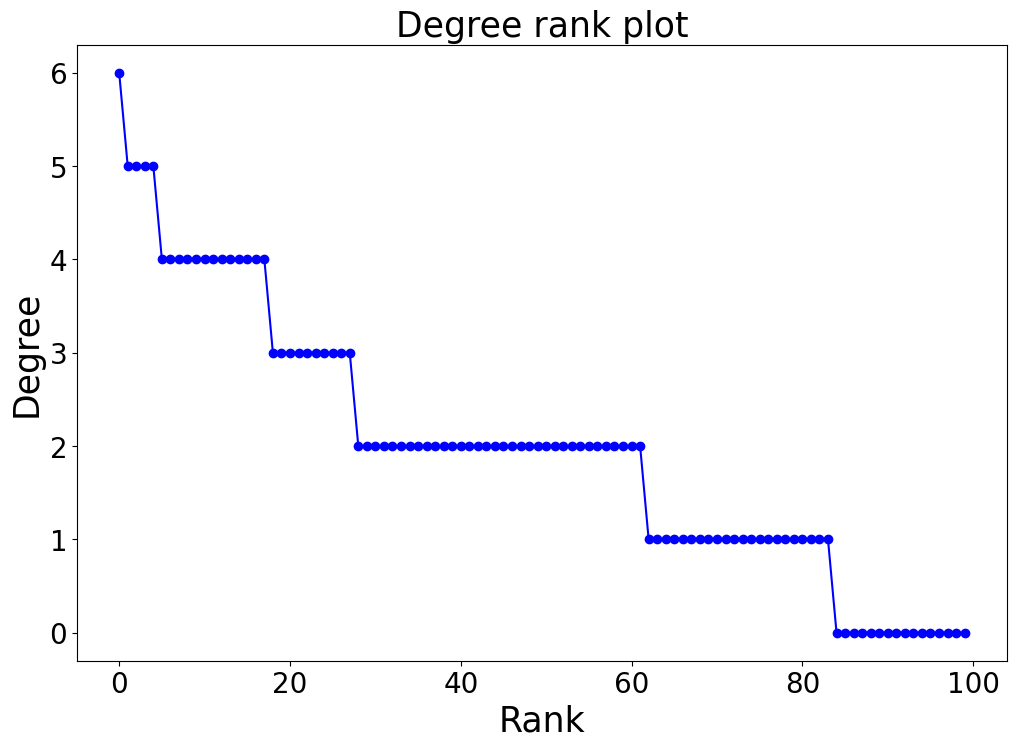

In [60]:
plt.figure(figsize=(12, 8))
plt.plot(sorted_degree, "b-", marker="o")
plt.title("Degree rank plot", fontsize=25)
plt.xlabel("Rank", fontsize=25)
plt.ylabel("Degree", fontsize=25)
plt.tick_params(labelsize=20)   # set x, y tick

In [65]:
# np.unique could get number of item in list
x = np.unique(sorted_degree, return_counts=True)[0]
y = np.unique(sorted_degree, return_counts=True)[1]

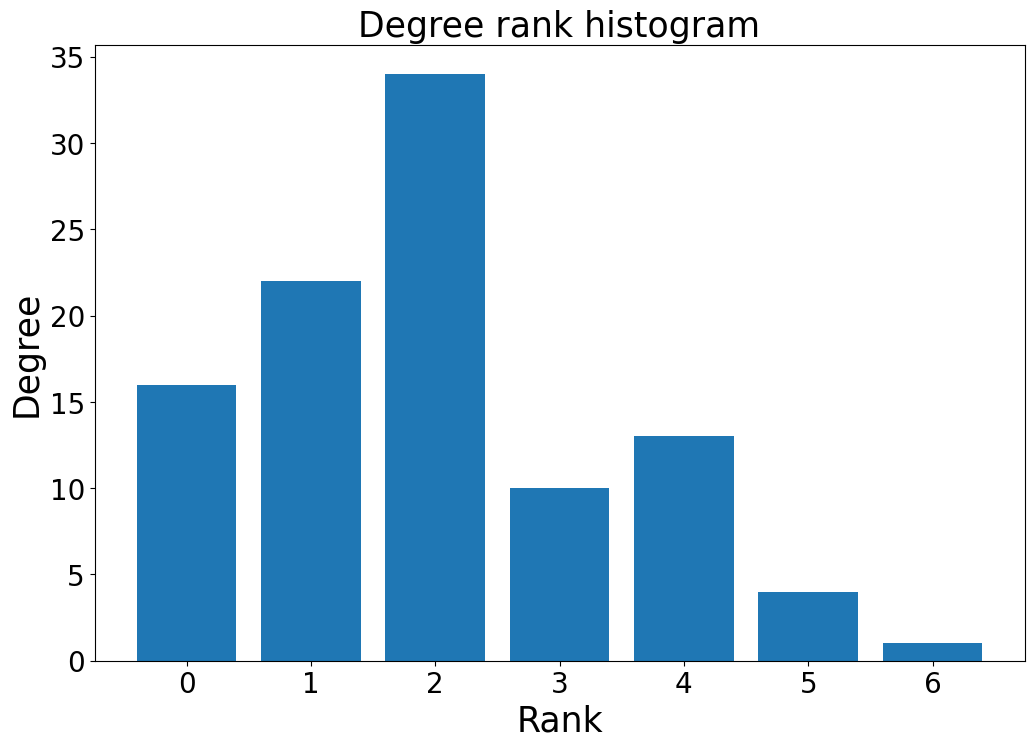

In [69]:
plt.figure(figsize=(12, 8))
plt.bar(x, y)
plt.title("Degree rank histogram", fontsize=25)
plt.xlabel("Rank", fontsize=25)
plt.ylabel("Degree", fontsize=25)
plt.tick_params(labelsize=20)   # set x, y tick